In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('medical_examination.csv', index_col =0)
df.head()


,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [2]:
df.isnull().sum()

age            0
sex            0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [3]:
df = df[
    (df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025)) &
    (df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] <= df['weight'].quantile(0.975))
]

print(df)


         age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                          
0      18393    2     168    62.0    110     80            1     1      0   
1      20228    1     156    85.0    140     90            3     1      0   
2      18857    1     165    64.0    130     70            3     1      0   
3      17623    2     169    82.0    150    100            1     1      0   
4      17474    1     156    56.0    100     60            1     1      0   
...      ...  ...     ...     ...    ...    ...          ...   ...    ...   
99991  19699    1     172    70.0    130     90            1     1      0   
99992  21074    1     165    80.0    150     80            1     1      0   
99993  19240    2     168    76.0    120     80            1     1      1   
99998  22431    1     163    72.0    135     80            1     2      0   
99999  20540    1     170    72.0    120     80            2     1      0   

In [4]:
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

print(df)



         age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                          
0      18393    2     168    62.0    110     80            0     0      0   
1      20228    1     156    85.0    140     90            1     0      0   
2      18857    1     165    64.0    130     70            1     0      0   
3      17623    2     169    82.0    150    100            0     0      0   
4      17474    1     156    56.0    100     60            0     0      0   
...      ...  ...     ...     ...    ...    ...          ...   ...    ...   
99991  19699    1     172    70.0    130     90            0     0      0   
99992  21074    1     165    80.0    150     80            0     0      0   
99993  19240    2     168    76.0    120     80            0     0      1   
99998  22431    1     163    72.0    135     80            0     1      0   
99999  20540    1     170    72.0    120     80            1     0      0   

In [5]:
# Assuming 'weight' is in kilograms and 'height' is in centimeters
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)

# Add 'overweight' column (1 if BMI >= 25, else 0)
df['overweight'] = df['BMI'].apply(lambda x: 1 if x >= 25 else 0)

print(df)

         age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                          
0      18393    2     168    62.0    110     80            0     0      0   
1      20228    1     156    85.0    140     90            1     0      0   
2      18857    1     165    64.0    130     70            1     0      0   
3      17623    2     169    82.0    150    100            0     0      0   
4      17474    1     156    56.0    100     60            0     0      0   
...      ...  ...     ...     ...    ...    ...          ...   ...    ...   
99991  19699    1     172    70.0    130     90            0     0      0   
99992  21074    1     165    80.0    150     80            0     0      0   
99993  19240    2     168    76.0    120     80            0     0      1   
99998  22431    1     163    72.0    135     80            0     1      0   
99999  20540    1     170    72.0    120     80            1     0      0   

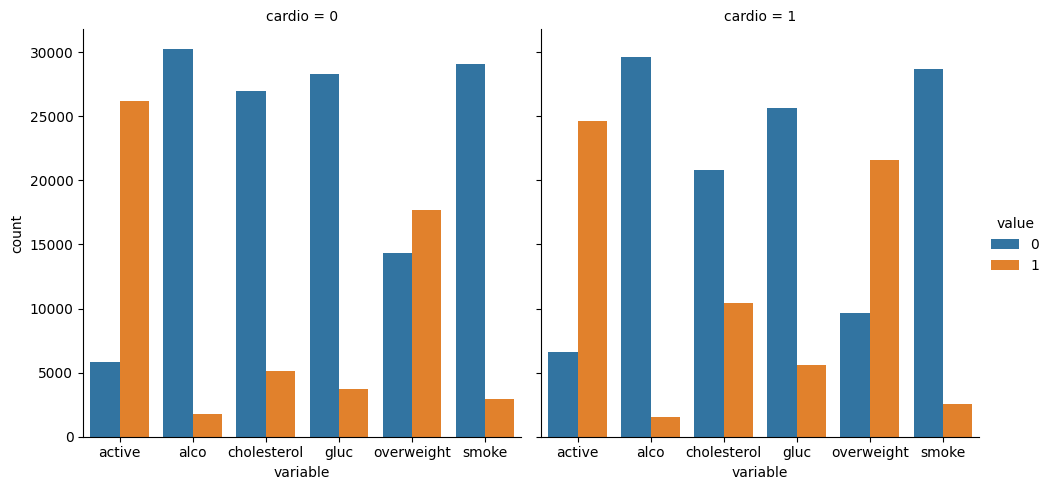

In [6]:
melted_df = df.melt(id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
sns.catplot(x='variable', hue='value', col='cardio', kind='count', data=melted_df)
plt.show()

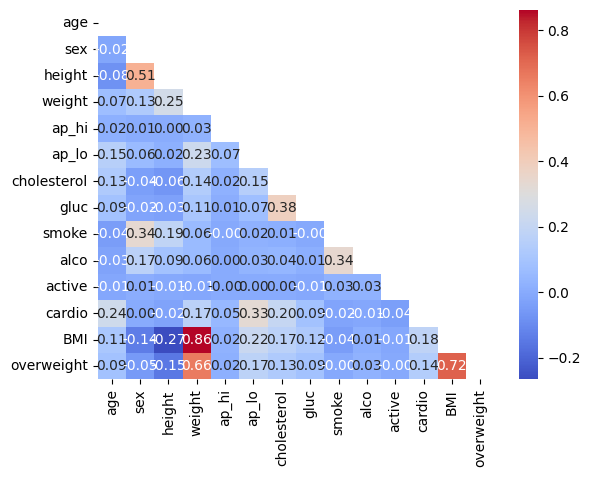

In [7]:
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.show()